# Home Assignment 1
- Giulia Luongo 10076102
- Mohammad Sukri 10062921
- Samer Sakor 10074501

## Neural Network Basics

We want to create a 2 layer NN, which means we want to calculate  $y = W_2 * ReLU(W_1 * x + b_1) + b_2$

Complete the TODOs below to create such a NN.

Since you will be needing to compute the gradients w.r.t. all parameters, you may look into online resources for help. Please cite or link any online recources you do use.

You are allowed to change any existing parts, however the code has to remain easy to understand and well documented.

In [1]:
import numpy as np

def relu(x):
    """
    ReLU (Rectified Linear Unit) activation function.

    Applies the ReLU function element-wise:
        ReLU(x) = max(0, x)

    Parameters:
        x (np.ndarray): Input array of shape (m, n), where m = input dimension, n = number of samples

    Returns:
        np.ndarray: Output array after applying ReLU, same shape as input
    """
    return x * (x > 0)


def relu_grad(x):
    """
    Gradient (derivative) of the ReLU activation function.

    The derivative of ReLU is:
        - 1 if x > 0
        - 0 if x <= 0

    Parameters:
        x (np.ndarray): Input array

    Returns:
        np.ndarray: Binary array of same shape as x, with 1 where x > 0, else 0
    """
    return (x > 0).astype(float)


In [2]:
class NumPyNeuralNet:
    
    def __init__(self, dim_in, dim_hidden, dim_out):
        """
        Initialize the parameters of a 2-layer neural network.

        Parameters:
            dim_in (int): Number of input features
            dim_hidden (int): Number of neurons in the hidden layer
            dim_out (int): Number of output neurons
        """
        self.dim_in = dim_in
        self.dim_hidden = dim_hidden
        self.dim_out = dim_out

        # Weight initialization scaled to avoid exploding values during training
        self.W_1 = np.random.randn(dim_hidden, dim_in) * 0.01
        self.b_1 = np.random.randn(dim_hidden, 1)
        self.W_2 = np.random.randn(dim_out, dim_hidden) * 0.01
        self.b_2 = np.random.randn(dim_out, 1)


    def predict(self, x):
        """
        Performs a forward pass through the neural network.

        Parameters:
            x (np.ndarray): Input array of shape (dim_in, n)

        Returns:
            np.ndarray: Predicted output ŷ of shape (dim_out, n)
        """

        # First layer: linear transformation then ReLU activation:
        self.z1 = np.dot(self.W_1, x) + self.b_1           # Shape: (dim_hidden, n)
        self.a1 = relu(self.z1)                            # Shape: (dim_hidden, n)

        # Second layer: linear transformation (no activation)
        self.z2 = np.dot(self.W_2, self.a1) + self.b_2     # Shape: (dim_out, n)

        return self.z2 # Final output of the network (ŷ), shape: (dim_out, n)


    def loss(self, x, y):
        """
        Computes Mean Squared Error (MSE) loss and gradients w.r.t all parameters.

        Parameters:
            x (np.ndarray): Input array of shape (dim_in, n)
            y (np.ndarray): True target array of shape (dim_out, n)

        Returns:
            Tuple:
                - loss (float): Mean squared error
                - dW1, dW2, db1, db2: Gradients for all parameters
        """
        y_pred = self.predict(x) # Forward pass to get predictions
        n = x.shape[1]  # number of training examples

        # Compute MSE loss:
        error = y_pred - y
        loss = np.mean(np.square(error))

        # Backpropagation:
        dL_dz2 = (2 / n) * error                        # Derivative of MSE loss w.r.t. z2 (output layer pre-activation)
        dL_dW2 = np.dot(dL_dz2, self.a1.T)              # Gradient of loss w.r.t. W2 (output weights)
        dL_db2 = np.sum(dL_dz2, axis=1, keepdims=True)  # Gradient of loss w.r.t. b2 (output bias)


        dL_da1 = np.dot(self.W_2.T, dL_dz2)             # Gradient w.r.t. activation of hidden layer (a1)
        dL_dz1 = dL_da1 * relu_grad(self.z1)            # Apply ReLU derivative to get gradient w.r.t. z1
        dL_dW1 = np.dot(dL_dz1, x.T)                    # Gradient of loss w.r.t. W1 (input weights)
        dL_db1 = np.sum(dL_dz1, axis=1, keepdims=True)  # Gradient of loss w.r.t. b1 (input bias)

        return loss, dL_dW1, dL_dW2, dL_db1, dL_db2



    def train(self, x, y, lr=0.001, epochs=1000):
        """
        Trains the neural network using Stochastic Gradient Descent (SGD).

        Parameters:
            x (np.ndarray): Input data of shape (dim_in, n)
            y (np.ndarray): Ground truth labels of shape (dim_out, n)
            lr (float): Learning rate (default: 0.001)
            epochs (int): Number of training epochs (default: 1000)

        Returns:
            float: Final loss after training
        """

        loss_history = []
        for i in range(epochs):

            loss, dW1, dW2, db1, db2 = self.loss(x, y) #Compute loss and gradients

            #Update weights and biases using gradients:
            self.W_1 -= lr * dW1
            self.W_2 -= lr * dW2
            self.b_1 -= lr * db1
            self.b_2 -= lr * db2

            loss_history.append(loss)

            #Print the loss every 100 epochs:
            if i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss:.4f}")

        #Plot the loss curve
        import matplotlib.pyplot as plt
        plt.plot(loss_history)
        plt.title("Loss over Epochs")
        plt.xlabel("Epoch")
        plt.ylabel("Mean Squared Error")
        plt.grid(True)
        plt.show()

        return loss_history[-1] # Return the final loss value after training


Epoch 0, Loss: 28906.4452
Epoch 100, Loss: 23218.8754
Epoch 200, Loss: 16345.6788
Epoch 300, Loss: 16928.9674
Epoch 400, Loss: 16836.4220
Epoch 500, Loss: 15860.6572
Epoch 600, Loss: 15798.8523
Epoch 700, Loss: 15918.1073
Epoch 800, Loss: 15665.2032
Epoch 900, Loss: 15356.8559


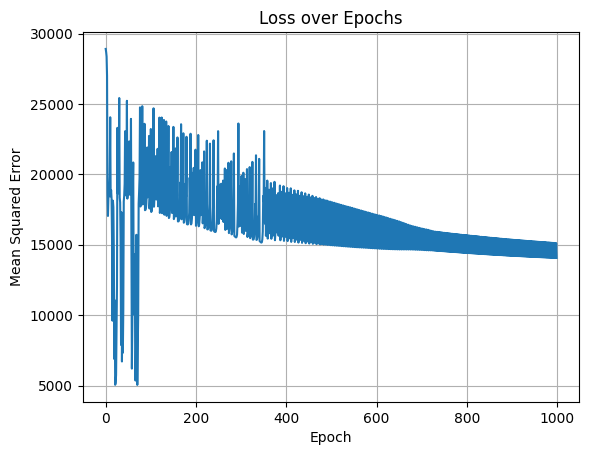

14063.573725799824


In [3]:
# We test the model created above on the simple function y = x^2

model = NumPyNeuralNet(1, 20, 1)

# Create a randomly distributed array of 1000 values
x_train = 10 * np.random.randn(1, 1000)
# Create ground truth by calculating x*x
y_train = x_train * x_train

loss = model.train(x_train, y_train)
print(loss)

## Embeddings

### Intrinsic evaluation of embeddings
Word similarity task is often used as an intrinsic evaluation criteria. In the dataset file you will find a list of word pairs with their similarity scores as judged by humans. The task would be to judge how well are the word vectors aligned to human judgement. We will use word2vec embedding vectors trained on the google news corpus. (Ignore the pairs where at least one the words is absent in the corpus)

In [1]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

Write a function which takes as input two words and computes the cosine similarity between them.
You do not need to implement the cosine similarity calculation from scratch. Feel free to use any Python library.
Remeber to ignore any pairs where at least one word is absent in the corpus. (2 points)

In [2]:
def similarity(word1, word2):
    """
    Compute the cosine similarity between two words using word2vec embeddings.
    
    Parameters:
        word1 (str): First word
        word2 (str): Second word
        
    Returns:
        float or None: Cosine similarity between the two words' embeddings,
                      or None if either word is not in the corpus
    """
    # Check if both words are in the word2vec vocabulary
    if word1 not in wv or word2 not in wv:
        return None  # Return None for pairs where at least one word is absent
    
    # Calculate cosine similarity using the word2vec model's built-in method
    similarity_score = wv.similarity(word1, word2)
    
    return similarity_score
# Example usage
word1 = "women"
word2 = "man"
similarity_score = similarity(word1, word2)
if similarity_score is not None:
    print(f"Cosine similarity between '{word1}' and '{word2}': {similarity_score}")

Cosine similarity between 'women' and 'man': 0.28830528259277344


Compute the similarity between all the word pairs in the list and sort them based on the similarity scores. (1 point)

In [3]:
import pandas as pd

# Read the word pairs dataset
word_pairs_df = pd.read_csv('wordsim353_dataset.csv')

# Compute similarity for each word pair
similarity_results = []
for _, row in word_pairs_df.iterrows():
    word1, word2 = row['Word 1'], row['Word 2']
    sim_score = similarity(word1, word2)
    
    # Add to results only if both words are in corpus
    if sim_score is not None:
        similarity_results.append({
            'Word 1': word1,
            'Word 2': word2,
            'Human Score': row['Human (mean)'],
            'Embedding Similarity': sim_score
        })

# Create DataFrame from results
similarity_df = pd.DataFrame(similarity_results)

# Sort by similarity score in descending order
sorted_by_similarity = similarity_df.sort_values(by='Embedding Similarity', ascending=False)

print(f"Total word pairs: {len(word_pairs_df)}")
print(f"Word pairs with both words in corpus: {len(similarity_df)}")
print("Top 10 most similar word pairs based on embeddings:")
sorted_by_similarity.head(10)

Total word pairs: 353
Word pairs with both words in corpus: 353
Top 10 most similar word pairs based on embeddings:


,Word 1,Word 2,Human Score,Embedding Similarity
2,tiger,tiger,10.00,1.000000
209,Harvard,Yale,8.13,0.781770
306,man,woman,8.30,0.766401
42,football,soccer,9.03,0.731355
170,mile,kilometer,8.66,0.725848
59,vodka,brandy,8.13,0.688149
68,journey,voyage,9.29,0.683085
43,football,basketball,6.81,0.668247
236,type,kind,8.97,0.666641
296,championship,tournament,8.36,0.665532


Sort the word pairs in the list based on the human judgement scores. (1 point)

In [4]:
# Sort the similarity DataFrame by human judgment scores in descending order
sorted_by_human = similarity_df.sort_values(by='Human Score', ascending=False)

print("Top 10 most similar word pairs based on human judgment:")
sorted_by_human.head(10)

Top 10 most similar word pairs based on human judgment:


,Word 1,Word 2,Human Score,Embedding Similarity
2,tiger,tiger,10.00,1.000000
40,fuck,sex,9.44,0.223392
68,journey,voyage,9.29,0.683085
73,midday,noon,9.29,0.552741
266,dollar,buck,9.22,0.256212
31,money,cash,9.15,0.615122
70,coast,shore,9.10,0.508367
97,money,cash,9.08,0.615122
98,money,currency,9.04,0.160101
42,football,soccer,9.03,0.731355


Compute spearman rank correlation between the two ranked lists obtained in the previous two steps.
You do not need to implement the spearman rank correlation calculation from scratch. Feel free to use any Python library. (2 points)

In [5]:
from scipy.stats import spearmanr

# Extract the similarity scores from both ranked lists
embedding_scores = similarity_df['Embedding Similarity']
human_scores = similarity_df['Human Score']

# Compute Spearman rank correlation
correlation, p_value = spearmanr(embedding_scores, human_scores)

print(f"Spearman rank correlation between embedding similarity and human judgment: {correlation:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpret the correlation
if correlation > 0.7:
    interpretation = "Strong positive correlation"
elif correlation > 0.5:
    interpretation = "Moderate positive correlation"
elif correlation > 0.3:
    interpretation = "Weak positive correlation"
elif correlation > -0.3:
    interpretation = "Little to no correlation"
else:
    interpretation = "Negative correlation"
    
print(f"Interpretation: {interpretation}")
print("\nThis indicates how well the word2vec embeddings align with human judgment of word similarity.")

Spearman rank correlation between embedding similarity and human judgment: 0.7000
P-value: 2.8687e-53
Interpretation: Strong positive correlation

This indicates how well the word2vec embeddings align with human judgment of word similarity.


### Word embedding based clasifier
We will design a simple sentiment classifier based on the pre-trained word embeddings (google news).

Each data point is a movie review and the sentiment could be either positive (1) or negative (0)

In [6]:
import pickle
with open('sentiment_test_X.p', 'rb') as fs:
    test_X = pickle.load(fs)

len(test_X)

1821

In [7]:
test_X[0]

['If',
 'you',
 'sometimes',
 'like',
 'to',
 'go',
 'to',
 'the',
 'movies',
 'to',
 'have',
 'fun',
 ',',
 'Wasabi',
 'is',
 'a',
 'good',
 'place',
 'to',
 'start',
 '.']

In [8]:
with open('sentiment_test_y.p', 'rb') as fs:
    test_y = pickle.load(fs)
    
len(test_y)

1821

In [9]:
test_y[0]

1

In [10]:
with open('sentiment_train_X.p', 'rb') as fs:
    train_X = pickle.load(fs)
with open('sentiment_train_y.p', 'rb') as fs:
    train_y = pickle.load(fs)
with open('sentiment_val_X.p', 'rb') as fs:
    val_X = pickle.load(fs)
with open('sentiment_val_y.p', 'rb') as fs:
    val_y = pickle.load(fs)        

Given a review, compute its embedding by averaging over the embedding of its constituent words. Define a function which given a review as a list of words, generates its embeddings by averaging over the constituent word embeddings. (4 points)

In [11]:
def generate_embedding(review):
    
    embedding_sum = None
    word_count = 0
    
    # Process each word in the review
    for word in review:
        # Check if the word exists in the word2vec vocabulary
        if word in wv:
            # Get the embedding for this word
            word_embedding = wv[word]
            
            # Add to running sum or initialize if this is the first valid word
            if embedding_sum is None:
                embedding_sum = word_embedding.copy()  # Create a copy to avoid modifying the original
            else:
                embedding_sum += word_embedding
                
            word_count += 1
    
    # If no words from the review are in the vocabulary return a zero vector
    if word_count == 0:
        return np.zeros(wv.vector_size)
    
    # Return the average embedding
    return embedding_sum / word_count

Create a feed-forward network class with pytorch. (Hyperparamter choice such as number of layers, hidden size is left to you) (8 points)

In [12]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

class Classifier(nn.Module):
    def __init__(self, input_dim=300, hidden_dim1=256, hidden_dim2=128, output_dim=2, dropout_rate=0.3):
        super(Classifier, self).__init__()
        
        # 3-layer network with ReLU activations and dropout
        self.model = nn.Sequential(
            # First layer: input_dim -> hidden_dim1
            nn.Linear(input_dim, hidden_dim1),
            nn.BatchNorm1d(hidden_dim1),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            
            # Second layer: hidden_dim1 -> hidden_dim2
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.BatchNorm1d(hidden_dim2),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            
            # Output layer: hidden_dim2 -> output_dim
            nn.Linear(hidden_dim2, output_dim)
        )
    
    def forward(self, x):
        return self.model(x)
    
    def predict(self, x):
        with torch.no_grad():
            logits = self.forward(x)
            predictions = torch.argmax(logits, dim=1)
        return predictions

Create a Dataset class for efficiently enumerating over the dataset. (3 points)

In [13]:
class sent_data(Dataset):
    def __init__(self, reviews, labels, cache_embeddings=True):
        self.reviews = reviews
        self.labels = labels
        self.cache_embeddings = cache_embeddings
        
        # Verify that reviews and labels have the same length
        assert len(reviews) == len(labels), "Number of reviews and labels must match"
        
        # Precompute and cache embeddings if requested
        if cache_embeddings:
            print("Precomputing embeddings for faster training...")
            self.cached_embeddings = []
            for i, review in enumerate(reviews):
                if i % 1000 == 0 and i > 0:
                    print(f"Processed {i}/{len(reviews)} reviews")
                self.cached_embeddings.append(generate_embedding(review))
            print("Finished precomputing embeddings.")
    
    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, idx):
        # Get the label as a tensor
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        
        # Get the embedding
        if self.cache_embeddings:
            embedding = self.cached_embeddings[idx]
        else:
            embedding = generate_embedding(self.reviews[idx])
            
        # Convert embedding to tensor
        embedding = torch.tensor(embedding, dtype=torch.float)
        
        return embedding, label

Write a train function to train model. At the end of each epoch compute the validation accuracy and save the model with the best validation accuracy. (12 points)

In [14]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


def train(model, train_data, val_data, epochs=5, learning_rate=0.001, batch_size=32, save_dir='models'):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Training on: {device}")
    
    model.to(device)
    
    # Create data loaders for mini-batch training
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size)
    
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    best_val_accuracy = 0.0
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for batch_idx, (inputs, targets) in enumerate(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            # Update statistics
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += targets.size(0)
            train_correct += predicted.eq(targets).sum().item()
            
            # Print progress
            if (batch_idx + 1) % 20 == 0 or (batch_idx + 1) == len(train_loader):
                print(f'Epoch [{epoch+1}/{epochs}] Batch [{batch_idx+1}/{len(train_loader)}] '
                      f'Loss: {train_loss/(batch_idx+1):.4f} '
                      f'Acc: {100.0*train_correct/train_total:.2f}%')
        
        # Calculate epoch training statistics
        train_loss = train_loss / len(train_loader)
        train_accuracy = 100.0 * train_correct / train_total
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                
                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                
                # Update statistics
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += targets.size(0)
                val_correct += predicted.eq(targets).sum().item()
        
        # Calculate epoch validation statistics
        val_loss = val_loss / len(val_loader)
        val_accuracy = 100.0 * val_correct / val_total
        
        # Update training history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_accuracy)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_accuracy)
        
        # Print epoch statistics
        print(f'Epoch [{epoch+1}/{epochs}] '
              f'Train Loss: {train_loss:.4f} Train Acc: {train_accuracy:.2f}% '
              f'Val Loss: {val_loss:.4f} Val Acc: {val_accuracy:.2f}%')
        
        # Save model if it has the best validation accuracy so far
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            model_path = os.path.join(save_dir, 'best_model.pth')
            torch.save(model.state_dict(), model_path)
            print(f'Model saved with validation accuracy: {val_accuracy:.2f}%')
    
    # Load the best model
    model.load_state_dict(torch.load(os.path.join(save_dir, 'best_model.pth')))
    
    # Plot training history
    plt.figure(figsize=(12, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss vs. Epoch')
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.title('Accuracy vs. Epoch')
    
    plt.tight_layout()
    plt.show()
    
    return model, history

Evaluate the trained model on the test set and report the test accuracy. (3 points)

In [15]:
def evaluate(model, test_data, batch_size=64):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    model.to(device)
    
    # Create data loader for test data
    test_loader = DataLoader(test_data, batch_size=batch_size)
    
    model.eval()
    
    correct = 0
    total = 0
    all_predictions = []
    all_targets = []
    
    # Disable gradient calculation for evaluation
    with torch.no_grad():
        for inputs, targets in test_loader:
            # Move batch data to device
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            outputs = model(inputs)
            
            # Get predictions
            _, predicted = outputs.max(1)
            
            # Update statistics
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            
            # Store predictions and targets for further analysis if needed
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    
    # Calculate accuracy
    accuracy = 100.0 * correct / total
    
    print(f"Test Accuracy: {accuracy:.2f}%")
    print(f"Correctly classified: {correct}/{total} test samples")
    return accuracy

Precomputing embeddings for faster training...
Processed 1000/1821 reviews
Finished precomputing embeddings.
Trained model not found. Training a new model...
Precomputing embeddings for faster training...
Processed 1000/6920 reviews
Processed 2000/6920 reviews
Processed 3000/6920 reviews
Processed 4000/6920 reviews
Processed 5000/6920 reviews
Processed 6000/6920 reviews
Finished precomputing embeddings.
Precomputing embeddings for faster training...
Finished precomputing embeddings.
Training on: cpu
Epoch [1/100] Batch [20/217] Loss: 0.6202 Acc: 62.97%
Epoch [1/100] Batch [40/217] Loss: 0.5622 Acc: 68.59%
Epoch [1/100] Batch [60/217] Loss: 0.5391 Acc: 71.04%
Epoch [1/100] Batch [80/217] Loss: 0.5305 Acc: 71.80%
Epoch [1/100] Batch [100/217] Loss: 0.5200 Acc: 73.19%
Epoch [1/100] Batch [120/217] Loss: 0.5108 Acc: 73.88%
Epoch [1/100] Batch [140/217] Loss: 0.5027 Acc: 74.80%
Epoch [1/100] Batch [160/217] Loss: 0.4952 Acc: 75.49%
Epoch [1/100] Batch [180/217] Loss: 0.4846 Acc: 76.13%
Epoc

/tmp/ipykernel_37817/1509037342.py:115: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(save_dir, 'best_model.pth')))


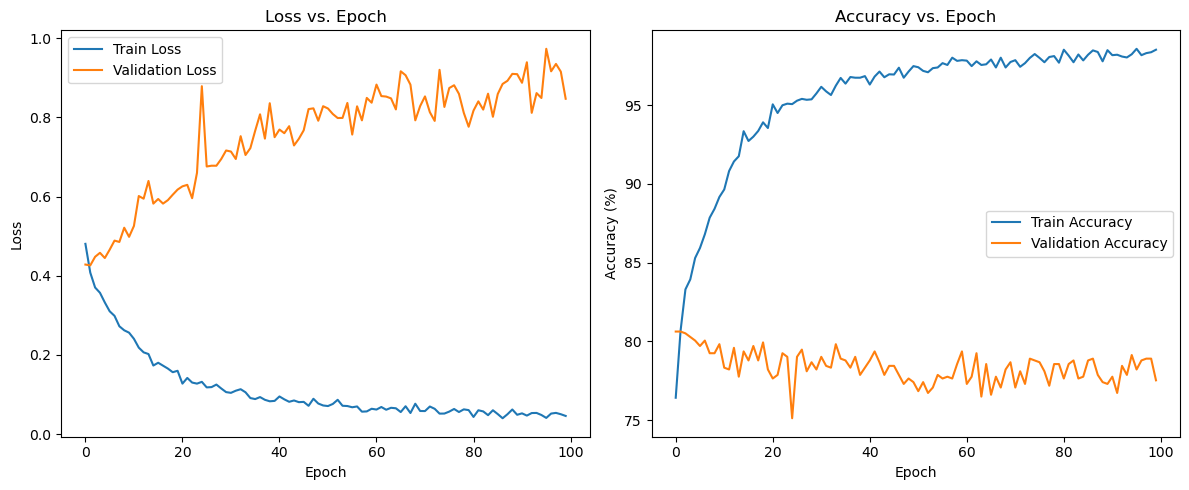

Test Accuracy: 81.33%
Correctly classified: 1481/1821 test samples
Final Test Accuracy: 81.33%


In [23]:
import os

# Create datasets
test_dataset = sent_data(test_X, test_y)

# Check if trained model exists, if not train it
model_path = 'models/best_model.pth'
if not os.path.exists(model_path):
	print("Trained model not found. Training a new model...")
	
	# Create training and validation datasets
	train_dataset = sent_data(train_X, train_y)
	val_dataset = sent_data(val_X, val_y)
	
	# Initialize model
	model = Classifier()
	
	model, history = train(model, train_dataset, val_dataset, epochs=100)
else:
	# Load the best trained model
	model = Classifier()
	model.load_state_dict(torch.load(model_path))
	print(f"Loaded trained model from {model_path}")

# Evaluate the model
test_accuracy = evaluate(model, test_dataset)
print(f"Final Test Accuracy: {test_accuracy:.2f}%")
